# Importing the libraries

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
print('np',np.__version__)
print('pd',pd.__version__)

np 1.24.3
pd 2.1.4


# EDA

In [132]:
df=pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


([<matplotlib.patches.Wedge at 0x1cc5c7617f0>,
 [Text(-0.5025943242672991, 0.9784676515931925, 'Non-diabetic'),
  Text(0.5025944158780503, -0.9784676045369114, 'Diabetic')],
 [Text(-0.27414235869125403, 0.5337096281417413, '65.10%'),
  Text(0.2741424086607547, -0.5337096024746789, '34.90%')])

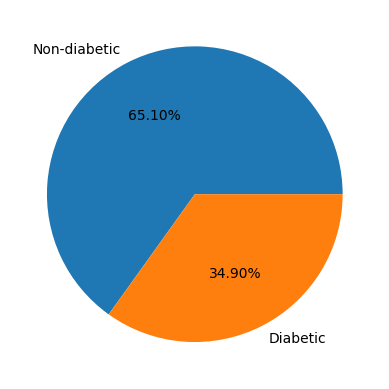

In [133]:
plt.pie(df["Outcome"].value_counts(),labels=["Non-diabetic","Diabetic"],autopct='%0.2f%%')

In [134]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [135]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Preprocessing

In [136]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [137]:
# X

In [138]:
# y

In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

In [140]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [141]:
X_train=sc.fit_transform(X_train)

In [142]:
len(X_train)

652

In [143]:
X_test=sc.transform(X_test)

In [144]:
len(X_test)

116

# Model selection

In [145]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [146]:
nb=GaussianNB()
svc=SVC(kernel='rbf')
knn=KNeighborsClassifier()
rf=RandomForestClassifier()

In [147]:
nb_accuracy=cross_val_score(estimator = nb, X = X_train, y = y_train, cv = 7)
svc_accuracy=cross_val_score(estimator = svc, X = X_train, y = y_train, cv = 7)
knn_accuracy=cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 7)
rf_accuracy=cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 7)

In [148]:
data=[[nb_accuracy.mean(),svc_accuracy.mean(),knn_accuracy.mean(),rf_accuracy.mean()],
      [nb_accuracy.std(),svc_accuracy.std(),knn_accuracy.std(),rf_accuracy.std()]]
accuracy_dataframe=pd.DataFrame(data,columns=["Naive Bayes","SVC","KNN","Random Forest"],index=["Accuracy","Stardard Deviation"])

In [149]:
accuracy_dataframe

,Naive Bayes,SVC,KNN,Random Forest
Accuracy,0.746936,0.749975,0.739239,0.757689
Stardard Deviation,0.022093,0.030434,0.030443,0.020337


# Hyperparameter tuning for SVC model

In [150]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = SVC(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 76.68 %
Best Parameters: {'C': 0.25, 'gamma': 0.1, 'kernel': 'rbf'}


# Training the SVC model

In [151]:
classifier=SVC(kernel='rbf',gamma=0.2,C=1)
classifier.fit(X_train,y_train)

SVC(C=1, gamma=0.2)

In [152]:
y_pred=classifier.predict(X_test)

In [153]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Confusion Matrix",confusion_matrix(y_test,y_pred))
print("Accuracy Score",accuracy_score(y_test,y_pred))

Confusion Matrix [[65  9]
 [19 23]]
Accuracy Score 0.7586206896551724


In [154]:
#Making a prediction system

input_data = [1,85,66,29,0,26.6,0.351,31]

input_data=np.array([input_data])

std_data = sc.transform(input_data)

prediction = classifier.predict(std_data)

if(prediction[0]==0):
  print('The person is non-Diabetic')
else:
  print('The person is Diabetic')

The person is non-Diabetic


# Storing model in file

In [156]:
# import pickle
# pickle.dump(classifier,open("classifier.pkl",'wb'))
# pickle.dump(sc,open("scaler.pkl",'wb'))